In [ ]:
! git clone https://github.com/LasseRegin/medical-question-answer-data.git

Cloning into 'medical-question-answer-data'...
remote: Enumerating objects: 22, done.
remote: Total 22 (delta 0), reused 0 (delta 0), pack-reused 22
Unpacking objects: 100% (22/22), done.


In [ ]:
! git clone https://github.com/sunil741/Medical-Chatbot-using-Bert-and-GPT2.git


Cloning into 'Medical-Chatbot-using-Bert-and-GPT2'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 26 (delta 9), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (26/26), done.


In [ ]:
!pip install transformers


     |████████████████████████████████| 4.0 MB 10.2 MB/s 
     |████████████████████████████████| 6.6 MB 47.9 MB/s 
     |████████████████████████████████| 77 kB 6.1 MB/s 
     |████████████████████████████████| 596 kB 7.9 MB/s 
     |████████████████████████████████| 880 kB 25.0 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=12220ecdc8e7e06de867fb450e5bb91a4d4668f102b483d9c224654f95c3d5e2
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built sacremoses
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
#importing the pretrained biobert tokenizer and the biobert model
from transformers import AutoTokenizer, TFAutoModel
biobert_tokenizer = AutoTokenizer.from_pretrained("cambridgeltl/BioRedditBERT-uncased")

biobert_model = TFAutoModel.from_pretrained("cambridgeltl/BioRedditBERT-uncased")

Downloading:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/462 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/413M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFBertModel.

All the layers of TFBertModel were initialized from the model checkpoint at cambridgeltl/BioRedditBERT-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
biobert_model.summary()


Model: "tf_bert_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  108310272 
                                                                 
Total params: 108,310,272
Trainable params: 108,310,272
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#function to extract question,answer and tags from the json objects
def extract_answer_question_tags(json_data):
  questions=[]
  answers=[]
  tags=[]
  for i in json_data:
    questions.append(i['question'])
    answers.append(i['answer'])
    tags.append(i['tags'])
  return questions,answers,tags

In [ ]:
#loading the json medical data files
import json
with open('/content/medical-question-answer-data/ehealthforumQAs.json') as f1:
  ehealth=json.load(f1)
print(ehealth)
  
# with open('icliniqQAs.json') as f2:
#   icliniq=json.load(f2)
# with open('questionDoctorQAs.json') as f3:
#   questiondoctor=json.load(f3)
# with open('webmdQAs.json') as f4:
#   webmd=json.load(f4)

[{'answer': 'stopping smoking is about will power and being steadfast. you can stop safely by having bupropion or nicotine patch cover initially in consult with a doctor. contact an addiction clinic near you. wishing you best of health thanks', 'question': 'how do i stop smoking now', 'url': 'http://ehealthforum.com/health/stop-smoking-question-t462882.html', 'tags': ['addiction', 'stop smoking']}, {'answer': 'hello this sounds quite unfamiliar that due to no reason at this age you have no cycle for last three months. pregnancy is surely a remote possibility as there was a tubal ligation. the endometriosis is also unlikely could cause stoppage of cycle. you definitely need some hormonal tests like thyroid or prolactin to know the balance inside as well as an withdrawal bleeding. meet your doctor for an evaluation.', 'question': 'i had a tubaligation 4 years ago and also have a minor case of endometriosis i am only 27 and my period stopped completely 3 months ago no more spotting in bet

In [ ]:
#function to extract question,answer and tags from the json objects
def extract_answer_question_tags(json_data):
  questions=[]
  answers=[]
  tags=[]
  for i in json_data:
    questions.append(i['question'])
    answers.append(i['answer'])
    tags.append(i['tags'])
  return questions,answers,tags

In [ ]:
#extracting the question,answer and tags from the medical json objects
all_questions=[]
all_answers=[]
all_tags=[]
for i in [ehealth]:
  questions,answers,tags=extract_answer_question_tags(i)
  all_questions.extend(questions)
  all_answers.extend(answers)
  all_tags.extend(tags)
print(len(all_questions),len(all_answers),len(all_tags))

171 171 171


In [ ]:
#loading and storing the medical data into dataframe and csv file correspondingly.
import pandas as pd
all_data=pd.DataFrame({'questions':all_questions,'answers':all_answers,'tags':all_tags})
all_data.to_csv('all_data.csv',index=False)

In [ ]:
#loading medical data from the disk
all_data=pd.read_csv('all_data.csv')


In [ ]:
all_data

,questions,answers,tags
0,how do i stop smoking now,stopping smoking is about will power and being...,"['addiction', 'stop smoking']"
1,i had a tubaligation 4 years ago and also have...,hello this sounds quite unfamiliar that due to...,"['pregnancy', 'diet', 'endometriosis']"
2,could extra caffeine consumption be a cause of...,extra caffeine can cause gastric discomfort th...,"['breast cancer', 'cancer', 'breasts']"
3,"hello- i am a 24 year old female 5""4 & 115 lb ...",hello thanks for submitting your question here...,"['hair loss', 'diet', 'acne', 'ovulation and o..."
4,i was wanting to know if you could tell me if ...,i am glad to help you out. this is not possibl...,"['am i pregnant', 'pregnant', 'urine pregnancy..."
...,...,...,...
166,i belive my boyfriend is bipolar or has boderl...,what your boyfriend seems to be having is bipo...,"['smoking pot', 'bipolar', 'smoking', 'abusive..."
167,why do i feel so down when someone makes fun o...,depression is common with any comorbid illness...,['dyslexia']
168,please help! my fiance is bipolar but will not...,in bipolar disorder sometimes there are mixed ...,"['bipolar', 'medication', 'bipolar help', 'ang..."
169,i constantly have bursts of anger for no reaso...,hello. from your description here it seems you...,"['bipolar disorder', 'anxiety', 'bipolar', 'an..."


In [ ]:
import re
import numpy as np
#function to preprocess tags post loading from disk
def preprocess_tags(tags):
  tags=tags[1:-1]
  tags=tags.replace("\'",'')
  return np.array(tags.split(', '))

In [ ]:
#preprocessing the tags post loading from disk
all_data['tags']=all_data.tags.apply(lambda x: preprocess_tags(x))

In [ ]:
#displaying the data
all_data.head()

,questions,answers,tags
0,how do i stop smoking now,stopping smoking is about will power and being...,"[addiction, stop smoking]"
1,i had a tubaligation 4 years ago and also have...,hello this sounds quite unfamiliar that due to...,"[pregnancy, diet, endometriosis]"
2,could extra caffeine consumption be a cause of...,extra caffeine can cause gastric discomfort th...,"[breast cancer, cancer, breasts]"
3,"hello- i am a 24 year old female 5""4 & 115 lb ...",hello thanks for submitting your question here...,"[hair loss, diet, acne, ovulation and ovaries]"
4,i was wanting to know if you could tell me if ...,i am glad to help you out. this is not possibl...,"[am i pregnant, pregnant, urine pregnancy test..."


In [ ]:
import re
#preprocessing questions and answers.
def decontractions(phrase):
    """decontracted takes text and convert contractions into natural form.
     ref: https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python/47091490#47091490"""
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"won\’t", "will not", phrase)
    phrase = re.sub(r"can\’t", "can not", phrase)
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)

    phrase = re.sub(r"n\’t", " not", phrase)
    phrase = re.sub(r"\’re", " are", phrase)
    phrase = re.sub(r"\’s", " is", phrase)
    phrase = re.sub(r"\’d", " would", phrase)
    phrase = re.sub(r"\’ll", " will", phrase)
    phrase = re.sub(r"\’t", " not", phrase)
    phrase = re.sub(r"\’ve", " have", phrase)
    phrase = re.sub(r"\’m", " am", phrase)

    return phrase


def preprocess(text):
    # convert all the text into lower letters
    # remove the words betweent brakets ()
    # remove these characters: {'$', ')', '?', '"', '’', '.',  '°', '!', ';', '/', "'", '€', '%', ':', ',', '('}
    # replace these spl characters with space: '\u200b', '\xa0', '-', '/'
    
    text = text.lower()
    text = decontractions(text)
    text = re.sub('[$)\?"’.°!;\'€%:,(/]', '', text)
    text = re.sub('\u200b', ' ', text)
    text = re.sub('\xa0', ' ', text)
    text = re.sub('-', ' ', text)
    return text


all_data['preprocessed_question'] = all_data['questions'].apply(preprocess)
all_data['preprocessed_answer'] = all_data['answers'].apply(preprocess)
all_data.head()


,questions,answers,tags,preprocessed_question,preprocessed_answer
0,how do i stop smoking now,stopping smoking is about will power and being...,"[addiction, stop smoking]",how do i stop smoking now,stopping smoking is about will power and being...
1,i had a tubaligation 4 years ago and also have...,hello this sounds quite unfamiliar that due to...,"[pregnancy, diet, endometriosis]",i had a tubaligation 4 years ago and also have...,hello this sounds quite unfamiliar that due to...
2,could extra caffeine consumption be a cause of...,extra caffeine can cause gastric discomfort th...,"[breast cancer, cancer, breasts]",could extra caffeine consumption be a cause of...,extra caffeine can cause gastric discomfort th...
3,"hello- i am a 24 year old female 5""4 & 115 lb ...",hello thanks for submitting your question here...,"[hair loss, diet, acne, ovulation and ovaries]",hello i am a 24 year old female 54 & 115 lb &...,hello thanks for submitting your question here...
4,i was wanting to know if you could tell me if ...,i am glad to help you out. this is not possibl...,"[am i pregnant, pregnant, urine pregnancy test...",i was wanting to know if you could tell me if ...,i am glad to help you out this is not possible...


In [ ]:
#finding the lens of preprocessed questions and answers
all_data['question_len']=all_data['preprocessed_question'].apply(lambda x: len(x.split(' ')))
all_data['answer_len']=all_data['preprocessed_answer'].apply(lambda x: len(x.split(' ')))

In [ ]:
#printing different percentiles of question and answer lengths
import numpy as np
for i in range(0,101,10):
  print(i,np.percentile(all_data.question_len,i),np.percentile(all_data.answer_len,i))


0 2.0 7.0
10 21.0 48.0
20 33.0 58.0
30 53.0 68.0
40 63.0 76.0
50 83.0 85.0
60 104.0 103.0
70 148.0 124.0
80 174.0 151.0
90 192.0 192.0
100 425.0 488.0


In [ ]:
#printing different percentiles of question and answer lengths
for i in range(90,101,1):
  print(i,np.percentile(all_data.question_len,i),np.percentile(all_data.answer_len,i))

90 192.0 192.0
91 193.0 197.80000000000007
92 194.20000000000002 203.80000000000004
93 196.1 209.29999999999998
94 198.59999999999997 213.59999999999997
95 201.0 232.0
96 202.2 260.9999999999998
97 206.60000000000002 284.20000000000005
98 219.0 305.9999999999999
99 246.60000000000025 337.90000000000083
100 425.0 488.0


In [ ]:
#since more than 100% percent of questions and about 99% of all answers lie within 500 words, we use 500 as the max length
all_data['short_question']=all_data.apply(lambda x: ' '.join(x.preprocessed_question.split(' ')[:500]) if x.question_len>500 else x.preprocessed_question ,axis=1)
all_data['short_answer']=all_data.apply(lambda x: ' '.join(x.preprocessed_answer.split(' ')[:500]) if x.answer_len>500 else x.preprocessed_answer ,axis=1)

In [ ]:
#displaying the data post truncating the question and answers to length of 500
all_data.head(5)

,questions,answers,tags,preprocessed_question,preprocessed_answer,question_len,answer_len,short_question,short_answer
0,how do i stop smoking now,stopping smoking is about will power and being...,"[addiction, stop smoking]",how do i stop smoking now,stopping smoking is about will power and being...,6,38,how do i stop smoking now,stopping smoking is about will power and being...
1,i had a tubaligation 4 years ago and also have...,hello this sounds quite unfamiliar that due to...,"[pregnancy, diet, endometriosis]",i had a tubaligation 4 years ago and also have...,hello this sounds quite unfamiliar that due to...,58,70,i had a tubaligation 4 years ago and also have...,hello this sounds quite unfamiliar that due to...
2,could extra caffeine consumption be a cause of...,extra caffeine can cause gastric discomfort th...,"[breast cancer, cancer, breasts]",could extra caffeine consumption be a cause of...,extra caffeine can cause gastric discomfort th...,12,77,could extra caffeine consumption be a cause of...,extra caffeine can cause gastric discomfort th...
3,"hello- i am a 24 year old female 5""4 & 115 lb ...",hello thanks for submitting your question here...,"[hair loss, diet, acne, ovulation and ovaries]",hello i am a 24 year old female 54 & 115 lb &...,hello thanks for submitting your question here...,196,97,hello i am a 24 year old female 54 & 115 lb &...,hello thanks for submitting your question here...
4,i was wanting to know if you could tell me if ...,i am glad to help you out. this is not possibl...,"[am i pregnant, pregnant, urine pregnancy test...",i was wanting to know if you could tell me if ...,i am glad to help you out this is not possible...,63,80,i was wanting to know if you could tell me if ...,i am glad to help you out this is not possible...


In [ ]:
#preparing the positive label dataset by taking the original question and original answer
all_dataset=all_data[['short_question','short_answer','tags']].copy()
all_dataset['label']=1.0

In [ ]:
#displaying the positive labelled dataset
all_dataset.head(3)

,short_question,short_answer,tags,label
0,how do i stop smoking now,stopping smoking is about will power and being...,"[addiction, stop smoking]",1.0
1,i had a tubaligation 4 years ago and also have...,hello this sounds quite unfamiliar that due to...,"[pregnancy, diet, endometriosis]",1.0
2,could extra caffeine consumption be a cause of...,extra caffeine can cause gastric discomfort th...,"[breast cancer, cancer, breasts]",1.0


In [ ]:
#function to extract the negative samples using tags
def extract_negative_samples(question,tags):
  stop=False
  while (not stop):
    sample_row= all_dataset.sample()
    sample_tags=sample_row.tags.values[0]
    inter_tags=set(tags[0]).intersection(set(sample_tags))
    if len(inter_tags)==0:
      stop=True
  return sample_row

In [ ]:
#preparing the negative labelled dataset
from tqdm.notebook import tqdm
tqdm.pandas()
negative_labels=all_dataset.progress_apply(lambda x: pd.Series([x.short_question,extract_negative_samples(x.short_question,x.tags).short_answer.values[0],x.tags]),axis=1)
negative_labels['label']=-1.0
negative_labels.columns=['short_question','short_answer','tags','label']

  0%|          | 0/171 [00:00<?, ?it/s]

In [ ]:
#displaying the negative labelled dataset
negative_labels

,short_question,short_answer,tags,label
0,how do i stop smoking now,the location of the lumps might indicate infla...,"[addiction, stop smoking]",-1.0
1,i had a tubaligation 4 years ago and also have...,yes after the surgery any strenous activty inc...,"[pregnancy, diet, endometriosis]",-1.0
2,could extra caffeine consumption be a cause of...,regular over the counter vitamins and balanced...,"[breast cancer, cancer, breasts]",-1.0
3,hello i am a 24 year old female 54 & 115 lb &...,get evaluated it might have resulted for lifti...,"[hair loss, diet, acne, ovulation and ovaries]",-1.0
4,i was wanting to know if you could tell me if ...,sinemet is a combination of levodopa and carbi...,"[am i pregnant, pregnant, urine pregnancy test...",-1.0
...,...,...,...,...
166,i belive my boyfriend is bipolar or has boderl...,you are right but the body is not yours its yo...,"[smoking pot, bipolar, smoking, abusive, bipol...",-1.0
167,why do i feel so down when someone makes fun o...,i would advise you to explore all the avenues ...,[dyslexia],-1.0
168,please help my fiance is bipolar but will not ...,it is very common for all men and women to exp...,"[bipolar, medication, bipolar help, anger help...",-1.0
169,i constantly have bursts of anger for no reaso...,i would advise you to explore all the avenues ...,"[bipolar disorder, anxiety, bipolar, angry, an...",-1.0


In [ ]:
#concatenating the positive and negative labelled dataset to get the final labelled dataset.
all_data_with_labels=pd.concat([all_dataset,negative_labels],axis=0)
all_data_with_labels.shape

(342, 4)

In [ ]:
#splitting the data into train and validation
from sklearn.model_selection import train_test_split
train, validation = train_test_split(all_data_with_labels, test_size=0.2,random_state=42,shuffle=True,stratify=all_data_with_labels.label)

In [ ]:
#saving train and validation data to disk
train.to_csv('train_data_chatbot.csv',index=False)
validation.to_csv('validation_data_chatbot.csv',index=False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd '/content/drive/My Drive/chatbot'

[Errno 2] No such file or directory: '/content/drive/My Drive/chatbot'
/content


In [ ]:
#loading train and validation data from disk
import pandas as pd
train=pd.read_csv('train_data_chatbot.csv')
validation=pd.read_csv('validation_data_chatbot.csv')

In [ ]:
#displaying the train label counts
train.label.value_counts()

 1.0    137
-1.0    136
Name: label, dtype: int64

In [ ]:
#displaying the validation label counts
validation.label.value_counts()

-1.0    35
 1.0    34
Name: label, dtype: int64

In [ ]:
#displaying the train dataset
train.head(5)

,short_question,short_answer,tags,label
0,last few months our relationship does not goin...,current medical status a bump on my left foot ...,['broken hearted'],-1.0
1,im currently 18 4 weeks pregnant afp results c...,there is no harm in signing up to a gym or try...,['genetic disorders'],-1.0
2,well i was power lifting and the bar came down...,the history of hearing a pop indicates a soft ...,['orthopedics'],1.0
3,its been since august 15 2012 and i have had i...,it seems you are suffering from reflux and gas...,['bellybutton' 'infection' 'august' 'sleep' 's...,1.0
4,my sister is a 31 year old female she has had ...,current medical status fibromyalgia ibs and ar...,['small intestine' 'stomach cancer' 'abdominal...,-1.0


In [ ]:
#extracting the short answers and questions from the train data
questions=train['short_question']
answers=train['short_answer']
labels=train['label']

In [ ]:
#https://blog.tensorflow.org/2019/05/transformer-chatbot-tutorial-with-tensorflow-2.html
#Setting Max_length to be 512 as discussed above
MAX_LENGTH = 512
import tensorflow as tf


# Tokenize, filter and pad sentences
def tokenize_and_filter(questions, answers):
  tokenized_questions, tokenized_answers = [], []
  
  for (question, answer) in zip(questions, answers):
    # generating sequences
    tokenized_question =  biobert_tokenizer.encode(question)
    tokenized_answer = biobert_tokenizer.encode(answer)
    tokenized_questions.append(tokenized_question)
    tokenized_answers.append(tokenized_answer)

  # padding the sequences
  tokenized_questions = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_questions, maxlen=MAX_LENGTH, padding='post')
  tokenized_answers = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_answers, maxlen=MAX_LENGTH, padding='post')
  
  return tokenized_questions, tokenized_answers

#tokenizing and padding the train questions and answers
questions, answers = tokenize_and_filter(questions, answers)

In [ ]:
#preparing the question mask and the answer mask of the train dataset
train_question_mask=[[1 if token!=0 else 0 for token in question] for question in questions]
train_answer_mask=[[1 if token!=0 else 0 for token in answer] for answer in answers]

In [ ]:

#extracting the short answers and questions from the validation data
val_questions=validation['short_question']
val_answers=validation['short_answer']
val_labels=validation['label']

In [ ]:
#tokenizing and padding the validation question and answers
val_questions, val_answers = tokenize_and_filter(val_questions, val_answers)

In [ ]:
#preparing the question and answer mask for the validation data
val_question_mask=[[1 if token!=0 else 0 for token in question] for question in val_questions]
val_answer_mask=[[1 if token!=0 else 0 for token in answer] for answer in val_answers]

In [ ]:
#https://blog.tensorflow.org/2019/05/transformer-chatbot-tutorial-with-tensorflow-2.html
#preparing the training  dataset
import tensorflow as tf
BATCH_SIZE = 2
BUFFER_SIZE = 20000
dataset = tf.data.Dataset.from_tensor_slices((
    {
        'question': questions,
        'answer': answers,
        'question_mask':train_question_mask,
        'answer_mask':train_answer_mask
    },
    {
        'label': labels.values
    },
))

# dataset = dataset.cache()
dataset = dataset.shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE,drop_remainder=True)
dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)

In [ ]:
#https://blog.tensorflow.org/2019/05/transformer-chatbot-tutorial-with-tensorflow-2.html
#preparing the validation dataset
import tensorflow as tf
BATCH_SIZE = 2
BUFFER_SIZE = 20000
val_dataset = tf.data.Dataset.from_tensor_slices((
    {
        'question': val_questions,
        'answer': val_answers,
        'question_mask':val_question_mask,
        'answer_mask':val_answer_mask
    },
    {
        'label': val_labels.values
    },
))

val_dataset = val_dataset.cache()
val_dataset = val_dataset.shuffle(BUFFER_SIZE)
val_dataset = val_dataset.batch(BATCH_SIZE,drop_remainder=True)
val_dataset = val_dataset.prefetch(tf.data.experimental.AUTOTUNE)

In [ ]:
#creating the ffn layer 
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Concatenate,Conv1D,MaxPool1D,Dropout
class FFN(tf.keras.layers.Layer):
    def __init__(
            self,
            name='FFN',
            **kwargs):
        """Simple Dense wrapped with various layers
        """

        super(FFN, self).__init__(name=name, **kwargs)
        self.dropout = 0.2
        self.ffn_layer = tf.keras.layers.Dense(
            units=768,
            activation='relu',
            kernel_initializer=tf.keras.initializers.glorot_normal(seed=32),name='FC1')
        

    def call(self, inputs):
        ffn_embedding = self.ffn_layer(inputs)
        ffn_embedding = tf.keras.layers.Dropout(
            self.dropout)(ffn_embedding)
        ffn_embedding += inputs
        return ffn_embedding

In [ ]:
#displaying the biobert model summary
biobert_model.summary()

Model: "tf_bert_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  108310272 
                                                                 
Total params: 108,310,272
Trainable params: 108,310,272
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#creating the medicalbert model
#https://github.com/ash3n/DocProduct/blob/master/docproduct/models.py
class MedicalQAModelwithBert(tf.keras.Model):
    def __init__(
            self,
            trainable=False,
            name=''):
        super(MedicalQAModelwithBert, self).__init__(name=name)

        self.q_ffn_layer = FFN(name='q_ffn')
        self.a_ffn_layer = FFN(name='a_ffn')
        self.biobert_model=biobert_model
        self.biobert_model.trainable=trainable
        self.cos=tf.keras.layers.Dot(axes=1,normalize=True)

    def call(self, inputs):
      question_embeddings=self.biobert_model(input_ids=inputs['question'],attention_mask=inputs['question_mask']).pooler_output
      answer_embeddings=self.biobert_model(input_ids=inputs['answer'],attention_mask=inputs['answer_mask']).pooler_output
      q_ffnn=self.q_ffn_layer(question_embeddings)
      a_ffnn=self.a_ffn_layer(answer_embeddings)
      output=self.cos([q_ffnn,a_ffnn])
      return {"label":output}

In [ ]:
#defining custom callback
class custom_callback(tf.keras.callbacks.Callback):
  def on_train_begin(self, logs={}):
        ## on begin of training, we are creating a instance varible called history
        ## it is a dict with keys [loss, acc, val_loss, val_acc]
        self.history={'acc': []}

  def on_epoch_end(self, epoch, logs={}):
        self.history['acc'].append(logs.get('custom_metric_acc'))
  


        #saving the model if validation accuracy increased from previous epoch
        if  (epoch==0) or (logs.get('custom_metric_acc')>self.history['acc'][epoch-1]):
          self.model.save_weights('medical_bert_re'+str(epoch)+'/medic'+str(epoch)+'_'+str(logs.get('custom_metric_acc')))


        is_nan_values=[]
        for i in self.model.get_weights():
          is_nan_values.append(np.isnan(i).any())

        #stopping the training if weights is nan or loss is nan or inf
        if (np.array(is_nan_values).any() or (tf.math.is_nan(logs.get('loss'))) or (np.isinf(logs.get('loss')))):
          self.model.stop_training = True

        

In [ ]:
#defining the custom metric
batch_size=2
def custom_metric_acc(y_true,y_pred):
  y_true=tf.reshape(y_true,[tf.constant(batch_size)])
  y_pred=tf.reshape(y_pred,[tf.constant(batch_size)])
  c=tf.constant(0,dtype='float32')
  d=tf.cast(tf.math.greater_equal(y_true,c),dtype='float32')
  e=tf.cast(tf.math.greater_equal(y_pred,c),dtype='float32')
  f=tf.cast(tf.math.equal(d,e),dtype='float32')
  g=tf.reduce_sum(f)
  h=tf.cast(tf.shape(f),dtype='float32')
  i=g/h
  return i


In [ ]:
#compiling and training the medical qa model
import tensorflow.keras.backend as K
K.set_floatx('float32')
learning_rate=5e-6
num_epochs=3
optimizer = tf.keras.optimizers.Adam(lr=learning_rate)
medical_qa_model=MedicalQAModelwithBert(trainable=True)
medical_qa_model.compile(
    optimizer=optimizer, loss=tf.keras.losses.mean_squared_error, metrics=[custom_metric_acc])

epochs = num_epochs

medical_qa_model.fit(dataset,validation_data=val_dataset,epochs=epochs,callbacks=[custom_callback()])
medical_qa_model.summary()

Epoch 1/3


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


136/136 [==============================] - 100s 590ms/step - loss: 1.1903 - custom_metric_acc: 0.5074 - val_loss: 1.2056 - val_custom_metric_acc: 0.5000
Epoch 2/3
136/136 [==============================] - 78s 573ms/step - loss: 0.9709 - custom_metric_acc: 0.6287 - val_loss: 1.1425 - val_custom_metric_acc: 0.5735
Epoch 3/3
136/136 [==============================] - 79s 580ms/step - loss: 0.8630 - custom_metric_acc: 0.6654 - val_loss: 1.1273 - val_custom_metric_acc: 0.5147
Model: ""
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 q_ffn (FFN)                 multiple                  590592    
                                                                 
 a_ffn (FFN)                 multiple                  590592    
                                                                 
 tf_bert_model (TFBertModel)  multiple                 108310272 
                                                   

In [ ]:
import tensorflow.keras.backend as K
K.set_floatx('float32')
medical_qa_model=MedicalQAModelwithBert(trainable=True)
medical_qa_model.load_weights('/content/medical_bert_re2/medic2_0.6654411554336548')
learning_rate=5e-6
optimizer = tf.keras.optimizers.Adam(lr=learning_rate)
medical_qa_model.compile(
    optimizer=optimizer, loss=tf.keras.losses.mean_squared_error, metrics=[custom_metric_acc])

# original_labels=[]
predicted_labels=[]
from tqdm.notebook import tqdm
for i in tqdm(range(len(val_questions))):
  predicted_labels.append(medical_qa_model.predict({'question':np.array([val_questions[i]]),'question_mask':np.array([val_question_mask[i]]),
                             'answer':np.array([val_answers[i]]),'answer_mask':np.array([val_answer_mask[i]])})['label'][0][0])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


  0%|          | 0/69 [00:00<?, ?it/s]

In [ ]:
#defining function to return accuracy, correctly predicted positive points and correctly predicted negative points
def acc_threshold(predicted_labels,threshold):
  correct_pred_pos=[]
  correct_pred_neg=[]
  for i in range(len(predicted_labels)):
    if predicted_labels[i]<threshold and val_labels[i]==-1:
      correct_pred_neg.append(predicted_labels[i])
    elif predicted_labels[i]>=threshold and val_labels[i]==1:
      correct_pred_pos.append(predicted_labels[i])
  acc=len(correct_pred_pos+correct_pred_neg)/len(predicted_labels)
  print('accuracy for threshold',threshold,'is',acc)
  return (acc,correct_pred_pos,correct_pred_neg)

In [ ]:
#function to print the best accuracy and the threshold at which it is occuring
def best_threshold_acc(predicted_labels):
  acc=[]
  thresholds=np.array(range(-10,11,1))*0.1
  for i in tqdm(range(-10,11,1)):
    acc.append(acc_threshold(predicted_labels,i*0.1)[0])
  print('best accuracy is',max(acc),'at threshold',thresholds[np.argmax(acc)])

In [ ]:
#find best threshold and accuracy of the model with best train accuracy on validation data
# best_threshold_acc(predicted_labels)

accuracy for threshold 0.2 is 0.5797101449275363


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


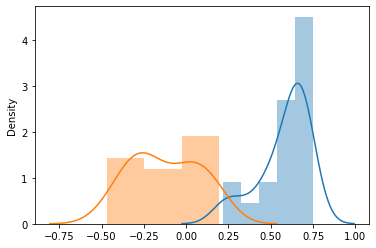

In [ ]:
#displaying the pdf of correctly predicted positive and negative points
import seaborn as sns
_,correct_pred_pos,correct_pred_neg=acc_threshold(predicted_labels,0.2)
sns.distplot(correct_pred_pos)
sns.distplot(correct_pred_neg)

In [ ]:
#evaluating the model on validation data
import warnings
warnings.filterwarnings('ignore')
import tensorflow.keras.backend as K
import tensorflow as tf
import numpy as np
K.set_floatx('float32')
medical_qa_model=MedicalQAModelwithBert(trainable=False)
medical_qa_model.load_weights('/content/medical_bert_re1/medic1_0.6286764740943909')
learning_rate=5e-6
optimizer = tf.keras.optimizers.Adam(lr=learning_rate)
predicted_labels=[]
from tqdm.notebook import tqdm
for i in tqdm(range(len(val_questions))):
  predicted_labels.append(medical_qa_model.predict({'question':np.array([val_questions[i]]),'question_mask':np.array([val_question_mask[i]]),
                             'answer':np.array([val_answers[i]]),'answer_mask':np.array([val_answer_mask[i]])})['label'][0][0])

  0%|          | 0/69 [00:00<?, ?it/s]

In [ ]:
#finding the best accuracy and the corresponding threshold of the model of best validation accuracy
best_threshold_acc(predicted_labels)

  0%|          | 0/21 [00:00<?, ?it/s]

accuracy for threshold -1.0 is 0.4927536231884058
accuracy for threshold -0.9 is 0.4927536231884058
accuracy for threshold -0.8 is 0.4927536231884058
accuracy for threshold -0.7000000000000001 is 0.4927536231884058
accuracy for threshold -0.6000000000000001 is 0.4927536231884058
accuracy for threshold -0.5 is 0.4927536231884058
accuracy for threshold -0.4 is 0.5217391304347826
accuracy for threshold -0.30000000000000004 is 0.5362318840579711
accuracy for threshold -0.2 is 0.5797101449275363
accuracy for threshold -0.1 is 0.5797101449275363
accuracy for threshold 0.0 is 0.5652173913043478
accuracy for threshold 0.1 is 0.5362318840579711
accuracy for threshold 0.2 is 0.5507246376811594
accuracy for threshold 0.30000000000000004 is 0.5507246376811594
accuracy for threshold 0.4 is 0.5217391304347826
accuracy for threshold 0.5 is 0.5507246376811594
accuracy for threshold 0.6000000000000001 is 0.6231884057971014
accuracy for threshold 0.7000000000000001 is 0.5072463768115942
accuracy for thr

In [ ]:
train_predicted_labels=[]
for i in tqdm(range(len(questions))):
  train_predicted_labels.append(medical_qa_model.predict({'question':np.array([questions[i]]),'question_mask':np.array([train_question_mask[i]]),
                             'answer':np.array([answers[i]]),'answer_mask':np.array([train_answer_mask[i]])})['label'][0][0])

  0%|          | 0/273 [00:00<?, ?it/s]

In [ ]:
#defining function to return accuracy, correctly predicted positive points and correctly predicted negative points for train data
def train_acc_threshold(predicted_labels,threshold):
  correct_pred_pos=[]
  correct_pred_neg=[]
  for i in range(len(predicted_labels)):
    if predicted_labels[i]<threshold and labels[i]==-1:
      correct_pred_neg.append(predicted_labels[i])
    elif predicted_labels[i]>=threshold and labels[i]==1:
      correct_pred_pos.append(predicted_labels[i])
  acc=len(correct_pred_pos+correct_pred_neg)/len(predicted_labels)
  print('accuracy for threshold',threshold,'is',acc)
  return (acc,correct_pred_pos,correct_pred_neg)

In [ ]:
#function to print the best accuracy and the threshold at which it is occuring for train points
def train_best_threshold_acc(predicted_labels):
  acc=[]
  thresholds=np.array(range(-10,11,1))*0.1
  for i in tqdm(range(-10,11,1)):
    acc.append(train_acc_threshold(predicted_labels,i*0.1)[0])
  print('best accuracy is',max(acc),'at threshold',thresholds[np.argmax(acc)])

In [ ]:
train_best_threshold_acc(train_predicted_labels)

  0%|          | 0/21 [00:00<?, ?it/s]

accuracy for threshold -1.0 is 0.5018315018315018
accuracy for threshold -0.9 is 0.5018315018315018
accuracy for threshold -0.8 is 0.5018315018315018
accuracy for threshold -0.7000000000000001 is 0.5018315018315018
accuracy for threshold -0.6000000000000001 is 0.5018315018315018
accuracy for threshold -0.5 is 0.5018315018315018
accuracy for threshold -0.4 is 0.5494505494505495
accuracy for threshold -0.30000000000000004 is 0.575091575091575
accuracy for threshold -0.2 is 0.5970695970695971
accuracy for threshold -0.1 is 0.6117216117216118
accuracy for threshold 0.0 is 0.6263736263736264
accuracy for threshold 0.1 is 0.6593406593406593
accuracy for threshold 0.2 is 0.663003663003663
accuracy for threshold 0.30000000000000004 is 0.6666666666666666
accuracy for threshold 0.4 is 0.6666666666666666
accuracy for threshold 0.5 is 0.673992673992674
accuracy for threshold 0.6000000000000001 is 0.663003663003663
accuracy for threshold 0.7000000000000001 is 0.5787545787545788
accuracy for thresho

accuracy for threshold 0.3 is 0.5507246376811594


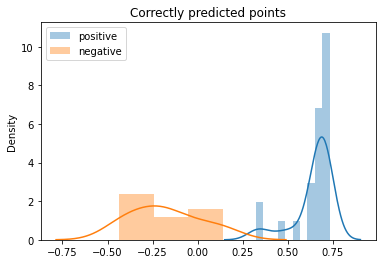

In [ ]:
#plotting the pdf of correctly predicted positive and negative points
import matplotlib.pyplot as plt
import seaborn as sns
_,correct_pred_pos,correct_pred_neg=acc_threshold(predicted_labels,0.3)
sns.distplot(correct_pred_pos,label='positive')
sns.distplot(correct_pred_neg,label='negative')
plt.title('Correctly predicted points')
plt.legend()
plt.show()

In [ ]:
#finding incorrectly predicted positive and negative points
incorrect_pos=[]
incorrect_neg=[]
for i in range(len(val_labels)):
  if val_labels[i]==1 and predicted_labels[i]<0.3:
    incorrect_pos.append(predicted_labels[i])
  elif val_labels[i]==-1 and predicted_labels[i]>=0.3:
    incorrect_neg.append(predicted_labels[i])

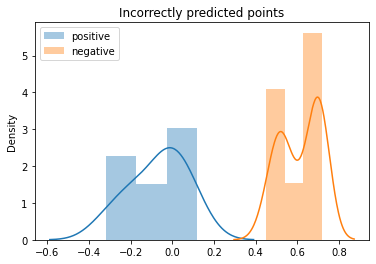

In [ ]:
#plotting the pdf of model predicted similarities for incorrectly predicted positive and negative points
sns.distplot(incorrect_pos,label='positive')
sns.distplot(incorrect_neg,label='negative')
plt.title('Incorrectly predicted points')
plt.legend()
plt.show()

In [ ]:

#loading the trained medical bert model from above checkpoint
medical_qa_model=MedicalQAModelwithBert(trainable=True)
medical_qa_model.load_weights('/content/medical_bert_re0/medic0_0.5073529481887817')

In [ ]:
#defining the question extractor model
x1=tf.keras.layers.Input((512),name='question',dtype='int64')
x2=tf.keras.layers.Input((512),name='question_mask',dtype='int64')
q_embed=medical_qa_model.get_layer('q_ffn')(medical_qa_model.get_layer('tf_bert_model').bert(input_ids=x1,attention_mask=x2,).pooler_output)
question_extractor_model=tf.keras.Model(inputs=[x1,x2],outputs=q_embed)

In [ ]:
#saving the question extractor model to disk
question_extractor_model.save('question_extractor_model_2_11')

INFO:tensorflow:Assets written to: question_extractor_model_2_11/assets


INFO:tensorflow:Assets written to: question_extractor_model_2_11/assets


In [ ]:
#loading the question extractor model from disk
question_extractor_model=tf.keras.models.load_model('question_extractor_model_2_11')

In [ ]:
#function to extract embeddings given a question and a question mask
def question_extractor(sam_dict):
  q_embed=question_extractor_model({'question':sam_dict['question'],'question_mask':sam_dict['question_mask']})
  return q_embed
  

In [ ]:
#defining function to extract question embeddings given question
def extract_question_embed(question):
  max_length=512
  tokenized_questions=[]
  tokenized_question =  biobert_tokenizer.encode(question)
  tokenized_questions.append(tokenized_question)

  # padding the sequences
  tokenized_questions = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_questions, maxlen=max_length, padding='post')
  attention_mask=[[1 if token>0 else 0 for token in q] for q in tokenized_questions]
  return question_extractor({'question':np.array(tokenized_questions),'question_mask':np.array(attention_mask)})

In [ ]:
#defining the answer extractor model
x1=tf.keras.layers.Input((512),name='answer',dtype='int64')
x2=tf.keras.layers.Input((512),name='answer_mask',dtype='int64')
a_embed=medical_qa_model.get_layer('a_ffn')(medical_qa_model.get_layer('tf_bert_model').bert(input_ids=x1,attention_mask=x2,).pooler_output)
answer_extractor_model=tf.keras.Model(inputs=[x1,x2],outputs=a_embed)

In [ ]:
#saving the answer extractor model to disk
answer_extractor_model.save('answer_extractor_model_2_13')

INFO:tensorflow:Assets written to: answer_extractor_model_2_13/assets


INFO:tensorflow:Assets written to: answer_extractor_model_2_13/assets


In [ ]:
#loading the answer extractor model from disk
answer_extractor_model=tf.keras.models.load_model('answer_extractor_model_2_13')

In [ ]:
#function to extract embeddings given an answer and an answer mask
def answer_extractor(sam_dict):
  a_embed=answer_extractor_model({'answer':sam_dict['answer'],'answer_mask':sam_dict['answer_mask']})
  return a_embed
  

In [ ]:
#defining function to extract answer embeddings
def extract_answer_embed(answer):
  max_length=512
  tokenized_answers=[]
  tokenized_answer =  biobert_tokenizer.encode(answer)
  tokenized_answers.append(tokenized_answer)

  # padding the sequences
  tokenized_answers = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_answers, maxlen=max_length, padding='post')
  attention_mask=[[1 if token>0 else 0 for token in q] for q in tokenized_answers]
  return answer_extractor({'answer':np.array(tokenized_answers),'answer_mask':np.array(attention_mask)})

In [ ]:
#extracting the original(without negative sampling) train dataset
pos_train=train[train.label==1.0].copy()
pos_train.shape

(137, 4)

In [ ]:
#extracting the original(without negative sampling) validation dataset
pos_validation=validation[validation.label==1.0].copy()
pos_validation.shape

(34, 4)

In [ ]:
#extracting the question embeddings of train data
from tqdm.notebook import tqdm
tqdm.pandas()
pos_train['short_question_embed']=pos_train.short_question.progress_apply(lambda x: extract_question_embed(x))

  0%|          | 0/137 [00:00<?, ?it/s]

In [ ]:
#extracting the question embeddings of validation data
pos_validation['short_question_embed']=pos_validation.short_question.progress_apply(lambda x: extract_question_embed(x))

  0%|          | 0/34 [00:00<?, ?it/s]

In [ ]:
#extracting the answer embeddings of train data
pos_train['short_answer_embed']=pos_train.short_answer.progress_apply(lambda x: extract_answer_embed(x))

  0%|          | 0/137 [00:00<?, ?it/s]

In [ ]:
#extracting the answer embeddings of validation data
pos_validation['short_answer_embed']=pos_validation.short_answer.progress_apply(lambda x: extract_answer_embed(x))

  0%|          | 0/34 [00:00<?, ?it/s]

In [ ]:
#converting embeddings from tensors to numpy arrays
pos_train['short_answer_embed_numpy']=pos_train.short_answer_embed.apply(lambda x: x.numpy() )
pos_train['short_question_embed_numpy']=pos_train.short_question_embed.apply(lambda x: x.numpy())

In [ ]:

#Saving train question and answer embeddings to disk
pos_train.drop(['short_answer_embed','short_question_embed'],axis=1).to_csv('re_train_embeds.csv',index=False)

In [ ]:
#saving validation question and answer embeddings to disk
pos_validation.drop(['short_answer_embed','short_question_embed'],axis=1).to_csv('re_validation_embeds.csv',index=False)

In [ ]:
#-----------------------------------------------------------------------------------------------------

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# cd 'drive/My Drive/chatbot'

In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf

In [ ]:
#loading question and answer embeddings of train and validation data from disk
train_embeds=pd.read_csv('/content/re_train_embeds.csv')
validation_embeds=pd.read_csv('/content/re_validation_embeds.csv')

In [ ]:
#function to preprocess question and answer embeddings post loading from disk
def preprocess_embeds(embed):
  output=[]
  embed=embed[2:-2]
  embed=embed.replace('\n','')
  for i in embed.split(' '):
    if i!=' ' and i!='':
      output.append(i)
  return (output)

In [ ]:
#preprocessing embeddings post loading from disk for train data
from tqdm.notebook import tqdm
tqdm.pandas()
train_embeds['question_embeds']=train_embeds.short_question_embed_numpy.progress_apply(lambda x: preprocess_embeds(x))
train_embeds['answer_embeds']=train_embeds.short_answer_embed_numpy.progress_apply(lambda x: preprocess_embeds(x))

In [ ]:
#preprocessing embeddings post loading from validation data
validation_embeds['question_embeds']=validation_embeds.short_question_embed_numpy.progress_apply(lambda x: preprocess_embeds(x))
validation_embeds['answer_embeds']=validation_embeds.short_answer_embed_numpy.progress_apply(lambda x: preprocess_embeds(x))

In [ ]:
#function to l2 normalize each embedding
def normalize(x):
  x=np.array(x,dtype=np.float64)
  return (x)/(np.linalg.norm(x))

In [ ]:
#normalizing train question and answer embeddings
train_embeds['question_embeds_norm']=train_embeds['question_embeds'].apply(lambda x: normalize(x))
train_embeds['answer_embeds_norm']=train_embeds['answer_embeds'].apply(lambda x: normalize(x))

In [ ]:
#Cleaning the gpt train data
train_gpt_data=train_embeds[['short_question','short_answer','question_embeds_norm','answer_embeds_norm']].copy()
train_gpt_data.columns=['question','answer','Q_FFNN_embeds','A_FFNN_embeds']
train_gpt_data.head(3)

In [ ]:
#saving gpt training data to disk
train_gpt_data.to_pickle("./train_gpt_data.pkl")

In [ ]:
#cleaning gpt validation data
validation_gpt_data=validation_embeds[['short_question','short_answer','question_embeds_norm','answer_embeds_norm']].copy()
validation_gpt_data.columns=['question','answer','Q_FFNN_embeds','A_FFNN_embeds']
validation_gpt_data.head(3)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
cd 'drive/My Drive/chatbot'

In [ ]:
#installing transformers library
!pip install transformers

In [ ]:
#installing faiss and other related libraries
!wget  https://anaconda.org/pytorch/faiss-cpu/1.2.1/download/linux-64/faiss-cpu-1.2.1-py36_cuda9.0.176_1.tar.bz2
!tar xvjf faiss-cpu-1.2.1-py36_cuda9.0.176_1.tar.bz2
!cp -r lib/python3.6/site-packages/* /usr/local/lib/python3.6/dist-packages/
!pip install mkl

In [ ]:
#importing other necessary libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import re
import os
import csv
from tqdm import tqdm
# import faiss
from nltk.translate.bleu_score import sentence_bleu

In [ ]:
!wget  https://anaconda.org/pytorch/faiss-cpu/1.2.1/download/linux-64/faiss-cpu-1.2.1-py36_cuda9.0.176_1.tar.bz2
!tar xvjf faiss-cpu-1.2.1-py36_cuda9.0.176_1.tar.bz2
!cp -r lib/python3.6/site-packages/* /usr/local/lib/python3.6/dist-packages/
!pip install mkl

In [ ]:
def decontractions(phrase):
    """decontracted takes text and convert contractions into natural form.
     ref: https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python/47091490#47091490"""
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"won\’t", "will not", phrase)
    phrase = re.sub(r"can\’t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)

    phrase = re.sub(r"n\’t", " not", phrase)
    phrase = re.sub(r"\’re", " are", phrase)
    phrase = re.sub(r"\’s", " is", phrase)
    phrase = re.sub(r"\’d", " would", phrase)
    phrase = re.sub(r"\’ll", " will", phrase)
    phrase = re.sub(r"\’t", " not", phrase)
    phrase = re.sub(r"\’ve", " have", phrase)
    phrase = re.sub(r"\’m", " am", phrase)

    return phrase


def preprocess(text):
    # convert all the text into lower letters
    # remove the words betweent brakets ()
    # remove these characters: {'$', ')', '?', '"', '’', '.',  '°', '!', ';', '/', "'", '€', '%', ':', ',', '('}
    # replace these spl characters with space: '\u200b', '\xa0', '-', '/'
    
    text = text.lower()
    text = decontractions(text)
    text = re.sub('[$)\?"’.°!;\'€%:,(/]', '', text)
    text = re.sub('\u200b', ' ', text)
    text = re.sub('\xa0', ' ', text)
    text = re.sub('-', ' ', text)
    return text

In [ ]:
#importing bert tokenizer and loading the trained question embedding extractor model
from transformers import AutoTokenizer, TFAutoModel
biobert_tokenizer = AutoTokenizer.from_pretrained("cambridgeltl/BioRedditBERT-uncased")
question_extractor_model1=tf.keras.models.load_model('question_extractor_model_2_11')

In [ ]:
# !pip install git-lfs

In [ ]:
# #importing gpt2 tokenizer and loading the trained gpt2 model
# from transformers import GPT2Tokenizer,TFGPT2LMHeadModel
# gpt2_tokenizer=GPT2Tokenizer.from_pretrained("gpt2")
# tf_gpt2_model=TFGPT2LMHeadModel.from_pretrained("/content/medic3_0.6654411554336548.data-00000-of-00001.json")

In [ ]:
# #preparing the faiss search
# qa=pd.read_pickle('./train_gpt_data.pkl')
# question_bert = qa["Q_FFNN_embeds"].tolist()
# answer_bert = qa["A_FFNN_embeds"].tolist()
# question_bert = np.array(question_bert)
# answer_bert = np.array(answer_bert)

# question_bert = question_bert.astype('float32')
# answer_bert = answer_bert.astype('float32')

# answer_index = faiss.IndexFlatIP(answer_bert.shape[-1])

# question_index = faiss.IndexFlatIP(question_bert.shape[-1])
# answer_index.add(answer_bert)
# question_index.add(question_bert)

In [ ]:
# #defining function to prepare the data for gpt inference
# #https://github.com/ash3n/DocProduct
# def preparing_gpt_inference_data(question,question_embedding):
#   topk=20
#   scores,indices=answer_index.search(
#                   question_embedding.astype('float32'), topk)
#   q_sub=qa.iloc[indices.reshape(20)]
  
#   line = '`QUESTION: %s `ANSWER: ' % (
#                         question)
#   encoded_len=len(gpt2_tokenizer.encode(line))
#   for i in q_sub.iterrows():
#     line='`QUESTION: %s `ANSWER: %s ' % (i[1]['question'],i[1]['answer']) + line
#     line=line.replace('\n','')
#     encoded_len=len(gpt2_tokenizer.encode(line))
#     if encoded_len>=1024:
#       break
#   return gpt2_tokenizer.encode(line)[-1024:]

In [ ]:
#function to generate answer given a question and the required answer length
def give_answer(question,answer_len):
  preprocessed_question=preprocess(question)
  question_len=len(preprocessed_question.split(' '))
  truncated_question=preprocessed_question
  if question_len>500:
    truncated_question=' '.join(preprocessed_question.split(' ')[:500])
  encoded_question= biobert_tokenizer.encode(truncated_question)
  max_length=512
  padded_question=tf.keras.preprocessing.sequence.pad_sequences(
      [encoded_question], maxlen=max_length, padding='post')
  question_mask=[[1 if token!=0 else 0 for token in question] for question in padded_question]
  embeddings=question_extractor_model1({'question':np.array(padded_question),'question_mask':np.array(question_mask)})
  print(embeddings)
  
  # gpt_input=preparing_gpt_inference_data(truncated_question,embeddings.numpy())
  # mask_start = len(gpt_input) - list(gpt_input[::-1]).index(4600) + 1
  # input=gpt_input[:mask_start+1]
  # if len(input)>(1024-answer_len):
  #  input=input[-(1024-answer_len):]
  # gpt2_output=gpt2_tokenizer.decode(tf_gpt2_model.generate(input_ids=tf.constant([np.array(input)]),max_length=1024,temperature=0.7)[0])
  # answer=gpt2_output.rindex('`ANSWER: ')
  # return gpt2_output[answer+len('`ANSWER: '):]
  

In [ ]:
#defining the final function to generate answer assuming default answer length to be 20
def final_func_1(question):
  answer_len=25
  return give_answer(question,answer_len)

In [ ]:
#defining the final function to calculate the required metric answer assuming default answer length to be 20
def final_func_2(question,answer):
  answer_len=20
  generated_answer=give_answer(question,answer_len)
  reference = [answer.split(' ')]
  candidate = generated_answer.split(' ')
  score = sentence_bleu(reference, candidate)
  return score

In [ ]:
#testing final_func1 on sample input
answer=final_func_1('Hi how are you')
print("answer:",answer)

In [ ]:
#testing final_fun2 on sample input
metric=final_func_2('Hi how are you','I am fine')
print(metric)